In [6]:
# Loading Data 
import pandas as pd  
import numpy as np
from pathlib import Path
import seaborn as sns
#import alpaca_trade_api as tradeapi


import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline
import os 
from dotenv import load_dotenv
import yfinance as yf
import quandl
import plotly.express as px
import plotly.graph_objects as go

In [7]:
# Import Quandl API key
load_dotenv()
quandl_api_key = os.getenv("QUANDL_API_KEY")

In [8]:
# GDP from Quandl 
gdp = quandl.get("FRED/GDP") 
#gdp.tail()

In [9]:
# Import confidence Data 
confidence_path = Path("data/one_year_confidence.csv")
confidence = pd.read_csv(confidence_path,parse_dates=True, index_col='Date', infer_datetime_format=True).dropna()
# Import monthly Dow Data 
dow_pct_change_path = Path("data/Dow Pct Change.csv")
dow_pct_change = pd.read_csv(dow_pct_change_path,parse_dates=True, index_col='Date', infer_datetime_format=True).dropna()
#dow_pct_change.head()

In [10]:
confidence[['US Institutional','US Individual']].hvplot(title='Individual and Institutional Confidence ',
                    x='Date',
                    y='', 
                    xlabel='Year',
                    ylabel='Percent',
                    label = '',)
                    


#confidence.plot(figsize = (30,10))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [45]:
confidence.head()

,US Institutional,US Individual
Date,,
2021-02-01,62.12,75.00
2021-01-01,61.90,73.17
2020-12-01,61.54,69.17
2020-11-01,62.86,70.68
2020-10-01,67.61,70.71


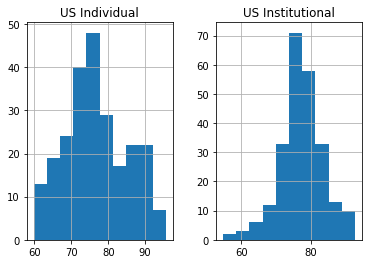

In [11]:
# Confidence distribution
confidence_dist = confidence.hist()

In [12]:
# Dow Performance when institutional confidence is greater than 70%
institutional_greater_70 = confidence.loc[confidence['US Institutional'] > 70].round(2)
inst_and_dow_greater_70 = pd.concat([dow_pct_change,institutional_greater_70], axis='columns', join='inner')
cumulative_returns = inst_and_dow_greater_70[["Percent Change"]]+1
cumulative_returns.cumprod().tail(1)

#cumulative_returns.count()

,Percent Change
Date,
2020-08-01,2.827144


##### The data shows that cumulative return when institutional confidence is greater than 70% is 183%

In [13]:
# Dow Performance when individual confidence is below greater than 70%
individual_greater_70 = confidence.loc[confidence['US Individual'] > 70].round(2)

ind_and_dow_greater_70 = pd.concat([dow_pct_change,individual_greater_70], axis='columns', join='inner')
cumprod_greater_individual = ind_and_dow_greater_70[["Percent Change"]]+1
cumprod_greater_individual.cumprod().tail(1)

,Percent Change
Date,
2021-02-01,2.308308


##### The data shows cumulative return when individual investor confidence is greater than 70% is 130% return

In [14]:
# US individual confidence return when less than 70
individual_below_70 = confidence.loc[confidence['US Individual'] < 70].round(2)
#individual_below_70.count()

# Concat the dataframes to include Dow points 
ind_and_dow_less_70 = pd.concat([dow_pct_change,individual_below_70], axis='columns', join='inner')
#ind_and_dow_less_70[["Percent Change"]].mean()


ind_less_than_70 = ind_and_dow_less_70[["Percent Change"]]+1
ind_less_than_70.cumprod().tail(1)

,Percent Change
Date,
2020-12-01,1.413598


##### The data shows that if you were to invest when individual confidence was less than 70%, you would return roughly 41%

In [15]:
# US institutional confidence return when less than 70%
institutional_below_70 = confidence.loc[confidence['US Institutional'] < 70].round(2)
#institutional_below_70.count()

# Dow Performance when institutional confidence is below 70
inst_and_dow_less_70 = pd.concat([dow_pct_change,institutional_below_70], axis='columns', join='inner')
inst_less_than_70 = inst_and_dow_less_70[["Percent Change"]]+1
inst_less_than_70.cumprod().tail(1)

,Percent Change
Date,
2021-02-01,1.154175


##### The data shows that if you were only to invest when institutional confidence was less than 70%, you would only return roughly 15%

### The data shows that the more bullish sentiment in the market derives from when institutional confidence is greater than 70%

# Who is "better" at predicting the market? 

In [16]:
# Return when institutional confidence is greater than individual confidence

instutitional_greater_individual = confidence.loc[confidence["US Institutional"] > confidence["US Individual"]]


# If you were to invest ONLY when institutional confidence was greater than individual confidence, you would have a return of almost 97%
institutional_greater_individual = pd.concat([dow_pct_change,instutitional_greater_individual], axis='columns', join='inner')
inst_over_ind = institutional_greater_individual[["Percent Change"]]+1
inst_over_ind.cumprod().tail(1)

,Percent Change
Date,
2020-07-01,1.972136


### The data shows that if you were to invest only when institutional confidence is greater than individual confidence, return is almost 97%

In [17]:
individual_greater_institutional = confidence.loc[confidence["US Institutional"] < confidence["US Individual"]]


individual_greater_institutional = pd.concat([dow_pct_change,individual_greater_institutional], axis='columns', join='inner')

ind_over_inst = individual_greater_institutional[["Percent Change"]]+1
ind_over_inst.cumprod().tail(1)

,Percent Change
Date,
2021-02-01,1.654561


In [18]:
inst_over_ind.count()

Percent Change    129
dtype: int64

In [19]:
ind_over_inst.count()

Percent Change    109
dtype: int64

#### Although institutional investors outperformed indivduals, they were overall more bullish on the market and had more inputs
#### We can conclude that "institutioals" outperformed "individuals" in this example

# Crash Confidence Correct? 

# Charts

In [43]:
my_DJI = yf.Ticker("^DJI")
my_DJI_df = my_DJI.history(period="20y")
my_DJI_df.drop(['Dividends', 'High', 'Low', 'Open', 'Stock Splits', 'Volume'], axis=1, inplace=True)
DJI_PCT = my_DJI_df.pct_change()

In [22]:
#The percent of the population who think that the market is not too high.
Investor_Valuation = pd.read_csv('data/us_valuation_confidence_index.csv',parse_dates=True, index_col='Date' )#, infer_datetime_format=True)

In [24]:
# Percent of market who thinks market is not too high 
Investor_Valuation[['US Institutional','US Individual']].hvplot(title='Investor Valuation ',
                    x='Date',
                    y='', 
                    xlabel='Year',
                    ylabel='Percent',
                    label = '',)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

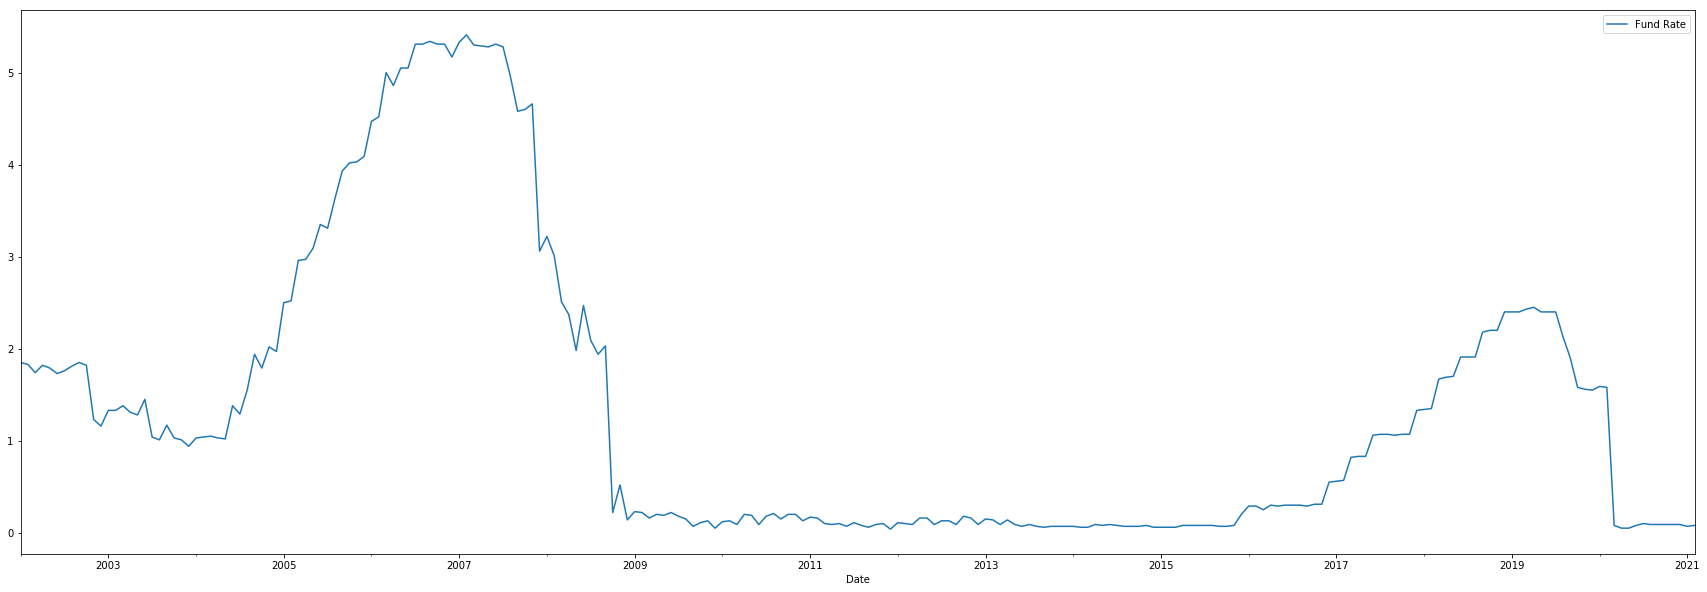

In [25]:
Eff_Fed_Fund_Rate = quandl.get("FRED/DFF", start_date='2002-01-01', end_date = '2021-02-01', collapse = 'monthly') 
Eff_Fed_Fund_Rate.rename(columns={'Value':'Fund Rate'}, inplace=True)
Eff_Fed_Fund_Rate.plot(figsize = (30,10))

In [26]:
SandPComposite = quandl.get("YALE/SPCOMP", start_date='2002-01-01', end_date = '2021-02-01', collapse = 'monthly')
SandP_Percent = SandPComposite['S&P Composite'].pct_change()

In [27]:
Misery_Index = quandl.get("USMISERY/INDEX", start_date='2002-01-01', end_date = '2021-02-01', collapse = 'monthly')
Misery_Index = Misery_Index.pct_change().dropna()
Misery_Index.head()

,Unemployment Rate,Inflation Rate,Misery Index
Date,,,
2002-02-28,0.000000,0.000000,0.000000
2002-03-31,0.000000,0.298246,0.049708
2002-04-30,0.035088,0.108108,0.050139
2002-05-31,-0.016949,-0.280488,-0.074271
2002-06-30,0.000000,-0.093220,-0.015759


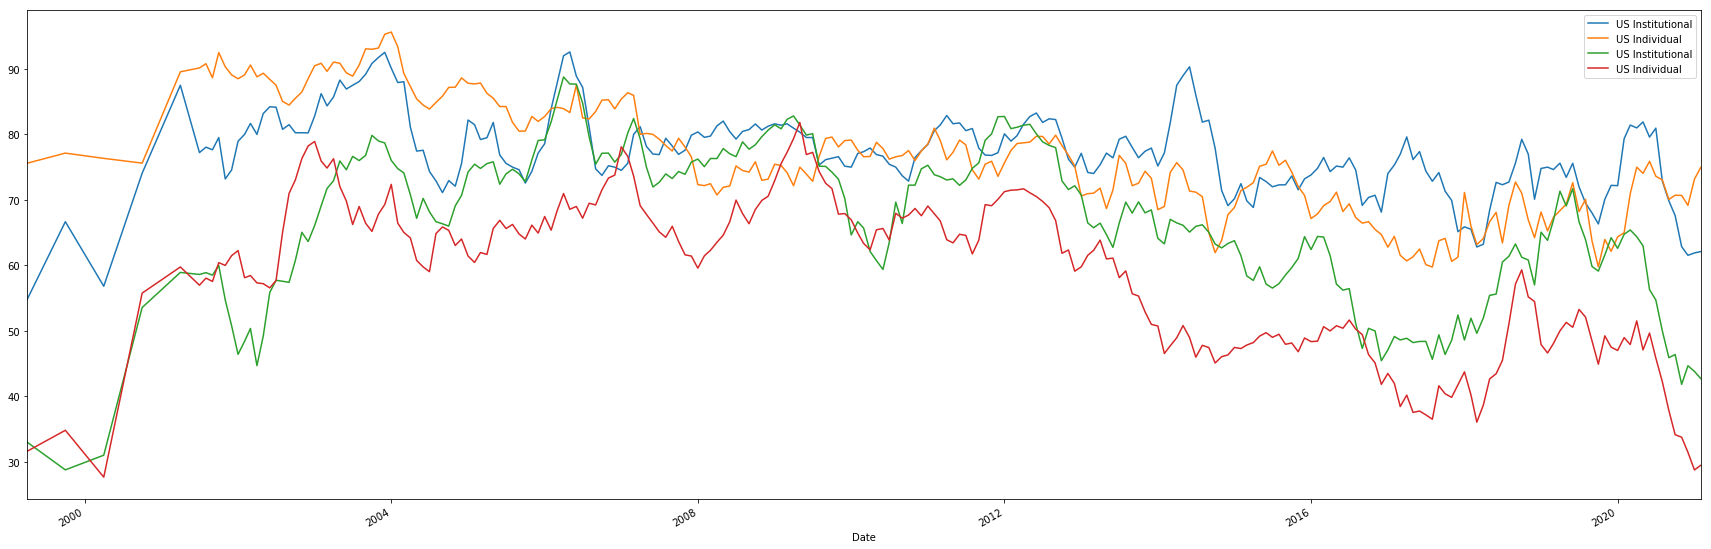

In [30]:
Investor_Merged = pd.concat([confidence, Investor_Valuation], axis=1, join='inner').dropna()
Investor_Merged.plot(figsize = (30,10))

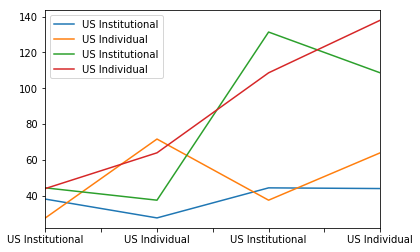

In [31]:
Investor_Merged.head()
Corr = Investor_Merged.corr()
Investor_Merged.cov().plot()

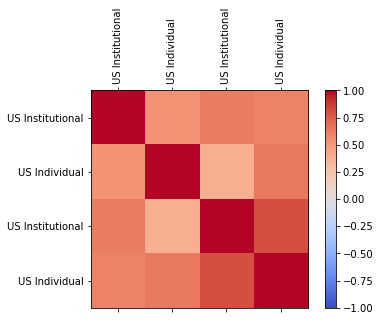

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(Corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Investor_Merged.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Investor_Merged.columns)
ax.set_yticklabels(Investor_Merged.columns)
plt.show()